In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style, colors
import pickle as pkl
import torch


In [9]:
with open(f"../../../outputs/transformer_p44_h1_stackFalse_10.pkl", 'rb') as file:
    meta_results = pkl.load(file)

# wave-LSTM outputs    
J = len(meta_results["resolution_embeddings"])
lbls = meta_results["labels"].cpu().numpy()
M = meta_results["M"]
attn1 = meta_results["Attn"].squeeze()
Mbar = np.mean(meta_results["M"], axis=1)
Mflat = meta_results["M"].reshape(meta_results["M"].shape[0], -1)
# A = meta_results["attention"]
print(attn1.shape)
print(f"Available outputs: {[i for i in meta_results.keys()]}")

(145, 8, 8)
Available outputs: ['masked_inputs', 'masked_targets', 'masked_targets_tensor', 'M', 'Attn', 'resolution_embeddings', 'masked_predictions', 'labels']


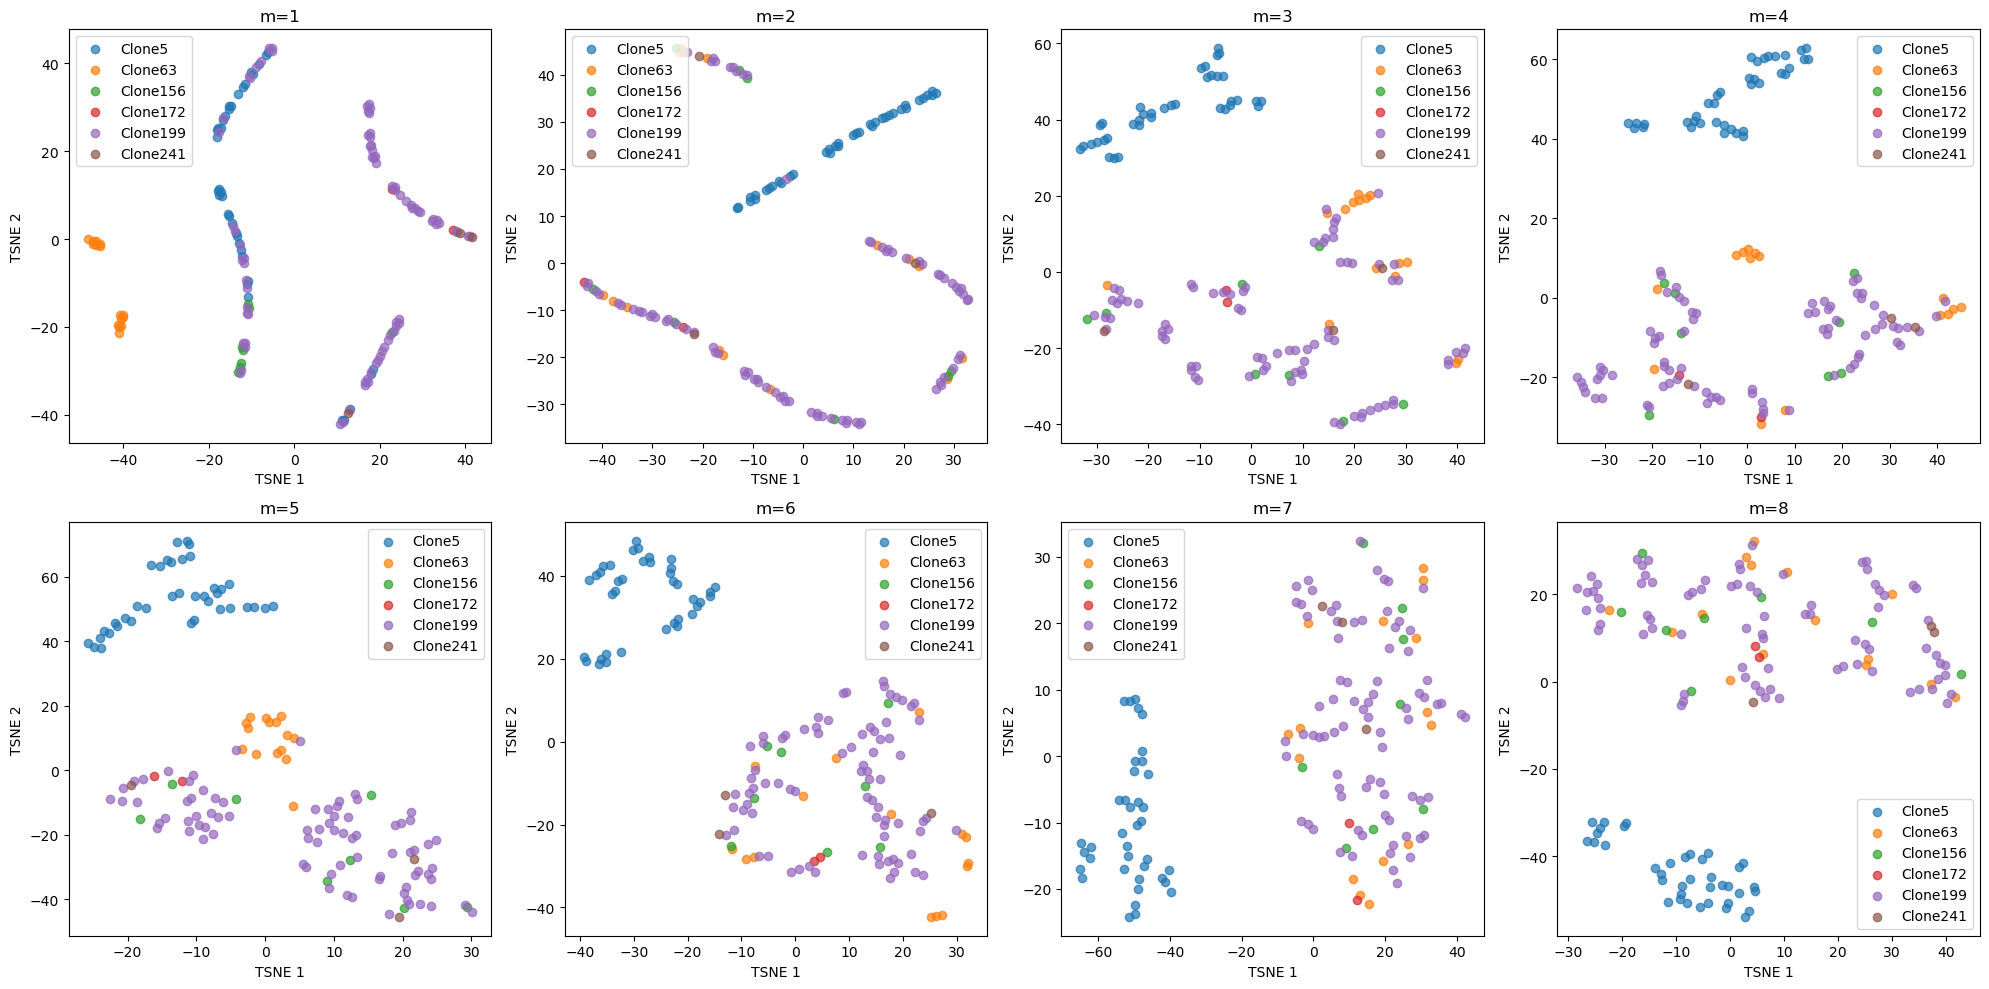

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

label_names = ["Clone5", "Clone63", "Clone156", "Clone172", "Clone199", "Clone241"]

num_embeddings = len(meta_results["resolution_embeddings"])
cols = 4
rows = (num_embeddings + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(20, 10))
axs = axs.flatten()  # Flatten the array for easy iteration

# Assuming meta_results["resolution_embeddings"] is a list of embeddings and lbls is defined
for i, res in enumerate(meta_results["resolution_embeddings"]):
    name = f"m={i + 1}"

    # Reshape data to (number_of_samples, flattened_features)
    flattened_data = res.reshape(res.shape[0], -1)

    # Apply t-SNE
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
    embedding = tsne.fit_transform(flattened_data)

    # Plotting in the corresponding subplot
    ax = axs[i]
    for label in np.unique(lbls):
        indices = lbls == label
        ax.scatter(embedding[indices, 0], embedding[indices, 1], label=label_names[label], alpha=0.7)
    
    ax.set_title(name)
    ax.set_xlabel('TSNE 1')
    ax.set_ylabel('TSNE 2')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# fig.legend(handles, labels, loc='upper center', ncol=len(label_names))

plt.tight_layout()
plt.show()


(145, 8, 16)


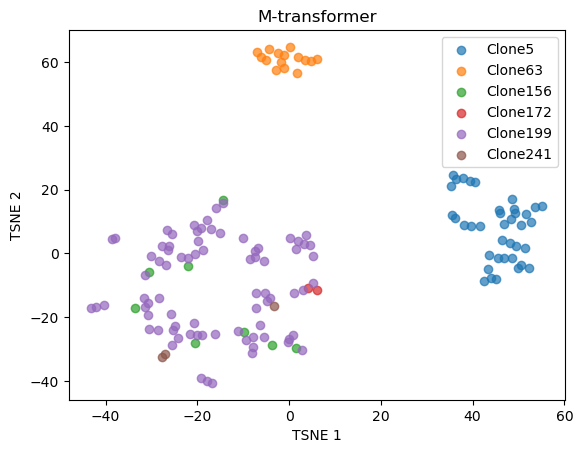

In [11]:
print(M.shape)
M = M.reshape(M.shape[0], -1)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=4)
embedding = tsne.fit_transform(M)
for label in np.unique(lbls):
    indices = lbls == label
    plt.scatter(embedding[indices, 0], embedding[indices, 1], label=label_names[label], alpha=0.7)

    # Step 3: Visualize the result
    # plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('M-transformer')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.legend()
plt.show()

In [12]:
res_8 = meta_results["resolution_embeddings"][7]
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("./"), '../../../')))
from src.TCGA.data_modules.CHISEL_S0E.loaders import DataModule, Dataset
from omegaconf import DictConfig, OmegaConf
import hydra

def stack_batches(dataloader):
    # Stack all test data for test hook
    CNA, labels = [], []
    for batch in iter(dataloader):
        CNA.append(batch["CNA"])
        labels.append(batch["label"])
    return {"CNA": torch.concat(CNA, 0),
            "label": torch.concat(labels, 0),}

def get_data(cfg):
    dm = DataModule(**cfg.data)
    print(f"width {dm.W}, channels {dm.C}")
    test_data = stack_batches(dm.test_dataloader())
    print(test_data['CNA'].shape)
    return test_data

cfg = OmegaConf.load('../confs/autoencoder_transformer_config.yaml')
OmegaConf.set_struct(cfg, False)
test_data = get_data(cfg)


/home/dashuo/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
2024-08-22 11:46:21.489310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/dashuo/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
Global seed set to 42
Global seed set to 42


width 256, channels 44
torch.Size([145, 44, 256])


In [13]:
# First, just create instance of whatever reducer we want to use throughout
reduce_method = "tSNE"         # tSNE or umap

reducer = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=4)

# axis labels
proj1_label = f"{reduce_method}-1"
proj2_label = f"{reduce_method}-2"

print(test_data["label"])

tensor([4, 0, 2, 4, 4, 4, 5, 0, 4, 0, 4, 1, 1, 4, 0, 4, 4, 4, 4, 2, 0, 4, 4, 4,
        0, 4, 1, 4, 1, 2, 4, 4, 0, 4, 5, 4, 1, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0,
        4, 1, 4, 4, 4, 4, 0, 4, 4, 1, 5, 0, 4, 2, 0, 1, 2, 4, 0, 4, 4, 4, 0, 4,
        4, 2, 0, 1, 4, 4, 4, 0, 1, 4, 4, 1, 1, 0, 4, 0, 4, 4, 2, 4, 4, 4, 4, 4,
        4, 4, 0, 0, 4, 4, 1, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 2, 3, 4, 0, 0, 4, 4,
        1, 0, 4, 0, 1, 4, 4, 4, 4, 3, 4, 4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4,
        0])


In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_res_emb = []
for j_res, j_name in zip([i for i in range(J)], [f"{j+1}" for j in range(J)]): 

    h_j = meta_results["resolution_embeddings"][j_res]
    x_j = meta_results["masked_inputs"][j_res]

    # Projection of scale embeddings, and source separated input
    for test, test_name in zip([h_j, x_j], ["m_j", "X_j"]):
        
        test = test.reshape((test.shape[0], -1))           # Reshape x_j to flatten channels
        test = StandardScaler().fit_transform(test)       # Scale before any transform
        
        embedding = reducer.fit_transform(test)
        for i in range(embedding.shape[0]):
            data_res_emb.append([i, 
                                 embedding[i, 0], embedding[i, 1], 
                                 test_name,
                                 j_name, 
                                 label_names[test_data["label"][i]],
                                ])  

df_res_emb = pd.DataFrame(data_res_emb, columns=["sample", proj1_label, proj2_label, "source", "resolution", "Clone"])
display(df_res_emb)

,sample,tSNE-1,tSNE-2,source,resolution,Clone
0,0,1.370691,-39.518032,m_j,1,Clone199
1,1,-4.790370,8.148755,m_j,1,Clone5
2,2,-37.607426,-23.890930,m_j,1,Clone156
3,3,24.937050,12.940554,m_j,1,Clone199
4,4,-17.428329,-16.382952,m_j,1,Clone199
...,...,...,...,...,...,...
2315,140,21.013639,-32.133690,X_j,8,Clone5
2316,141,8.904184,24.528526,X_j,8,Clone199
2317,142,16.584518,-37.121815,X_j,8,Clone5
2318,143,-8.983693,6.680685,X_j,8,Clone199


In [15]:
import sklearn.cluster
# Which latent space we wish to visualise
test_data["CNA"] = test_data["CNA"].reshape((-1, 2, 22, 256))
print(test_data["CNA"].shape)
j = 5
clone = "Clone199"
num_clusters = 10

# Which strand and chromosome to zoom into
chromosomes = [_ for _ in range(23)]

df_res_emb_cluster = df_res_emb[(df_res_emb["source"]=="m_j") & 
                                (df_res_emb["Clone"]==clone) & 
                                (df_res_emb["resolution"] == str(j))
                                 ]
print(df_res_emb_cluster["sample"].values)
features = test_data["CNA"][df_res_emb_cluster["sample"].values, :, :, :]
# display(df_res_emb_cluster)

clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=num_clusters)
clustering.fit(df_res_emb_cluster[[proj1_label, proj2_label]])
permute_idx = np.argsort(clustering.labels_)
sub_counts = [len(np.where(clustering.labels_==i)[0]) for i in range(num_clusters)]

torch.Size([145, 2, 22, 256])
[  0   3   4   5   8  10  13  15  16  17  18  21  22  23  25  27  30  31
  33  35  39  40  41  42  43  44  48  50  51  52  53  55  56  60  65  67
  68  69  71  72  76  77  78  81  82  86  88  89  91  92  93  94  95  96
  97 100 101 105 107 108 109 110 111 112 115 118 119 122 125 126 127 128
 130 131 132 135 139 141 143]


In [16]:
print(clustering.labels_)
print(features.shape)

[5 1 0 4 4 5 6 5 3 4 0 1 5 3 5 0 6 8 7 7 7 3 5 2 4 5 1 9 3 0 2 1 0 0 0 1 2
 3 9 2 6 8 2 6 0 1 5 9 5 1 1 4 1 8 6 1 5 0 3 3 1 2 4 6 4 0 2 8 8 3 5 2 6 4
 2 5 2 4 0]
torch.Size([79, 2, 22, 256])


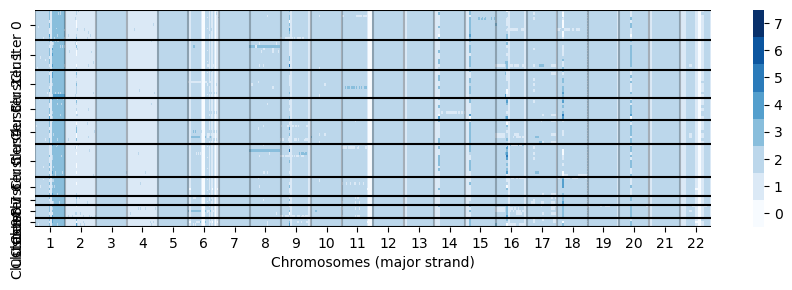

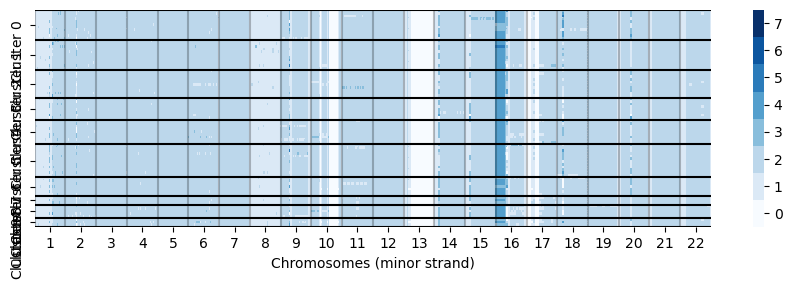

In [17]:
# Stacked channels
cmap = plt.cm.Blues
norm = colors.BoundaryNorm(np.arange(-0.5, 8.5, 1), cmap.N)

for _strand in range(1,3):
    fig, ax = plt.subplots(1, 1, figsize=(9,3))
    sns.heatmap(features[permute_idx, _strand-1, :, :].reshape((-1, 22*256)), 
                ax=ax, cmap=cmap, norm=norm, yticklabels=False,
               ) 
    # Vertical lines: indicating which chromosome we are zooming into in third plot
    for _chrom in range(1, 23):
        plt.axvline(x=(_chrom-1)*256, color='k', alpha=0.25)
    # Horizontal lines: separating sub-clusters
    splits = np.insert(np.cumsum(sub_counts), 0, 0)
    for split in splits:
        plt.axhline(y=split, color='k', linestyle='-')
    # Label y-axis
    ax.set_yticks((splits[1:] + splits[:-1])/2)
    ax.set_yticklabels([f"Cluster ${_i}$" for _i in range(num_clusters)], rotation=90)
    plt.ylim((len(permute_idx), 0, ))
    # plt.ylabel(f"Clone {clone} cells \n (sub-clusters of $h{tmp1}{j}{tmp2}$)")
    # X-axis
    ax.set_xticks([ (_chrom+0.5) * 256 for _chrom in range(22)])
    ax.set_xticklabels([_chrom for _chrom in range(1,23)], rotation=0)
    plt.xlabel(f"Chromosomes ({'major' if _strand == 1 else 'minor'} strand)")
    # Manually specify colorbar labelling after it's been generated
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(np.arange(0, 8))
    colorbar.set_ticklabels([i for i in range(8)])
    colorbar.minorticks_off() 
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"./Clone{clone}_{num_clusters}Subclusters_hj{j}_strand{_strand}.png", dpi=200, format='png', transparent=False)   

In [18]:
# for chromosome in chromosomes:        
#     # Zoom in
#     fig, axes = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
#     cbar_ax = fig.add_axes([.9, .2, .03, .7])
#     splits = np.insert(np.cumsum(sub_counts), 0, 0)
#     for strand, ax in enumerate(axes):
#         sns.heatmap(features[permute_idx, strand, chromosome-1, :], ax=ax, cmap=cmap, norm=norm, yticklabels=True, 
#                     cbar=strand == 0, cbar_ax=None if strand else cbar_ax)
#         # Horizontal lines: separating sub-clusters
#         for split in splits:
#             ax.axhline(y=split, color='k', linestyle='-')
#         # X-axis
#         ax.set_xlabel(f"Loci")
#         ax.set_xlim((0,256))
#         # Manually specify colorbar labelling after it's been generated
#         if not strand:
#             colorbar = ax.collections[0].colorbar
#             colorbar.set_ticks(np.arange(0, 8))
#             colorbar.minorticks_off() 
#         for _, spine in ax.spines.items():
#             spine.set_visible(True)
#             spine.set_color('black')
#             spine.set_linewidth(1)
#         ax.set_facecolor((0, 0, 0, 0))
#         ax.text(.05, .95, f"{'Major' if strand == 0 else 'Minor'}", ha='left', va='top', transform=ax.transAxes, size=16)
    
#     # # Y-axis
#     axes[0].set_yticks((splits[1:] + splits[:-1])/2)
#     axes[0].set_yticklabels([f"Sub-cluster ${_i}$" for _i in range(num_clusters)], rotation=90, fontdict={'horizontalalignment': "center"})   # \n (sub-clusters of $h{tmp1}{j}{tmp2}$)
#     axes[0].set_ylabel(f"Clone {clone} cells", loc="center")
#     fig.tight_layout(rect=[0, 0, .9, 1])
#     plt.savefig(f"figs/Clone{clone}_{num_clusters}Subclusters_hj{j}_Chr{chromosome}.png", dpi=200, format='png', transparent=False)   

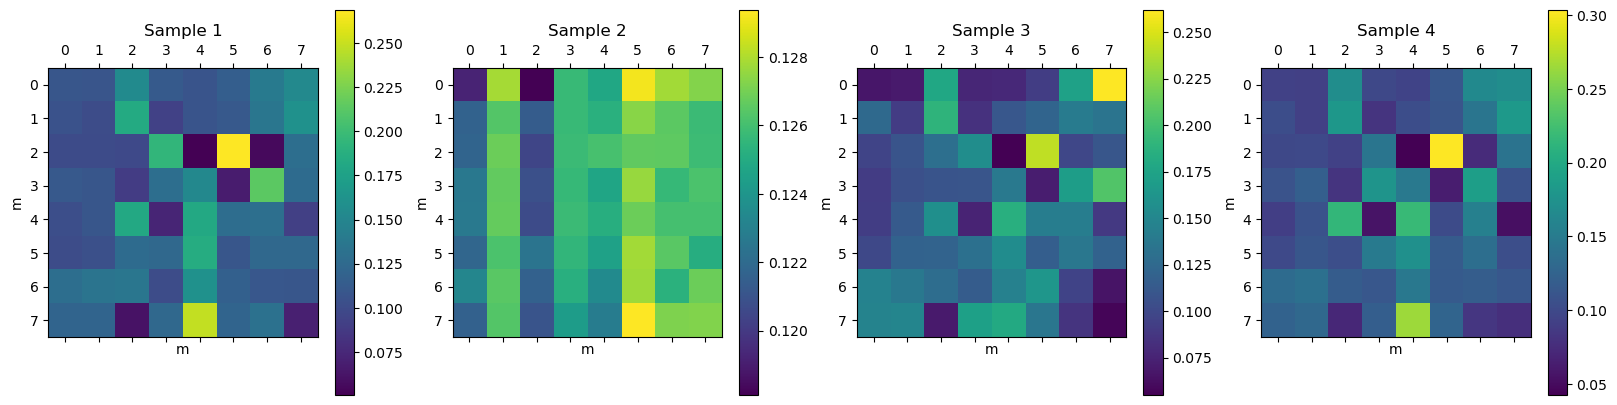

In [24]:
# Visualize the attention matrix for each head
num_samples = 4
seq_length = attn1.shape[1]

# Create a figure with subplots for each head
fig1, axes1 = plt.subplots(1, num_samples, figsize=(20, 5))

for i in range(num_samples):
    ax = axes1[i]
    cax = ax.matshow(attn1[i], cmap='viridis')
    ax.set_title(f'Sample {i+1}')
    ax.set_xlabel('m')
    ax.set_ylabel('m')
    fig1.colorbar(cax, ax=ax)

plt.show()

(8, 8)


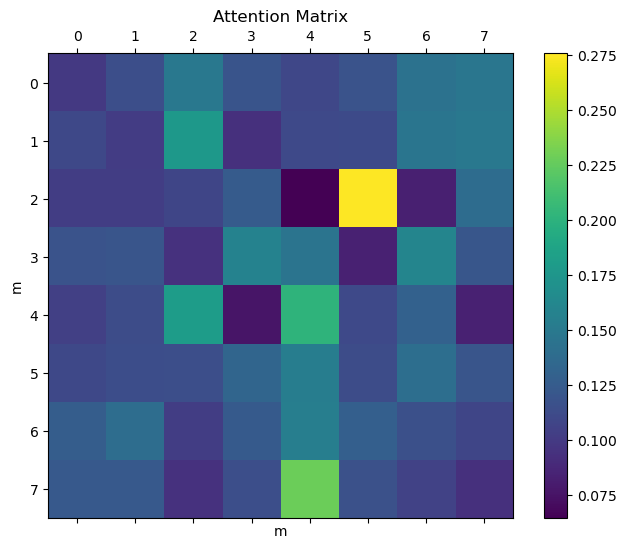

In [29]:
attn = np.mean(attn1, 0).squeeze()
print(attn.shape)
# Visualize the attention matrix
plt.figure(figsize=(8, 6))
plt.matshow(attn, cmap='viridis', fignum=1)
plt.colorbar()
plt.title('Attention Matrix')
plt.xlabel('m')
plt.ylabel('m')
plt.show()

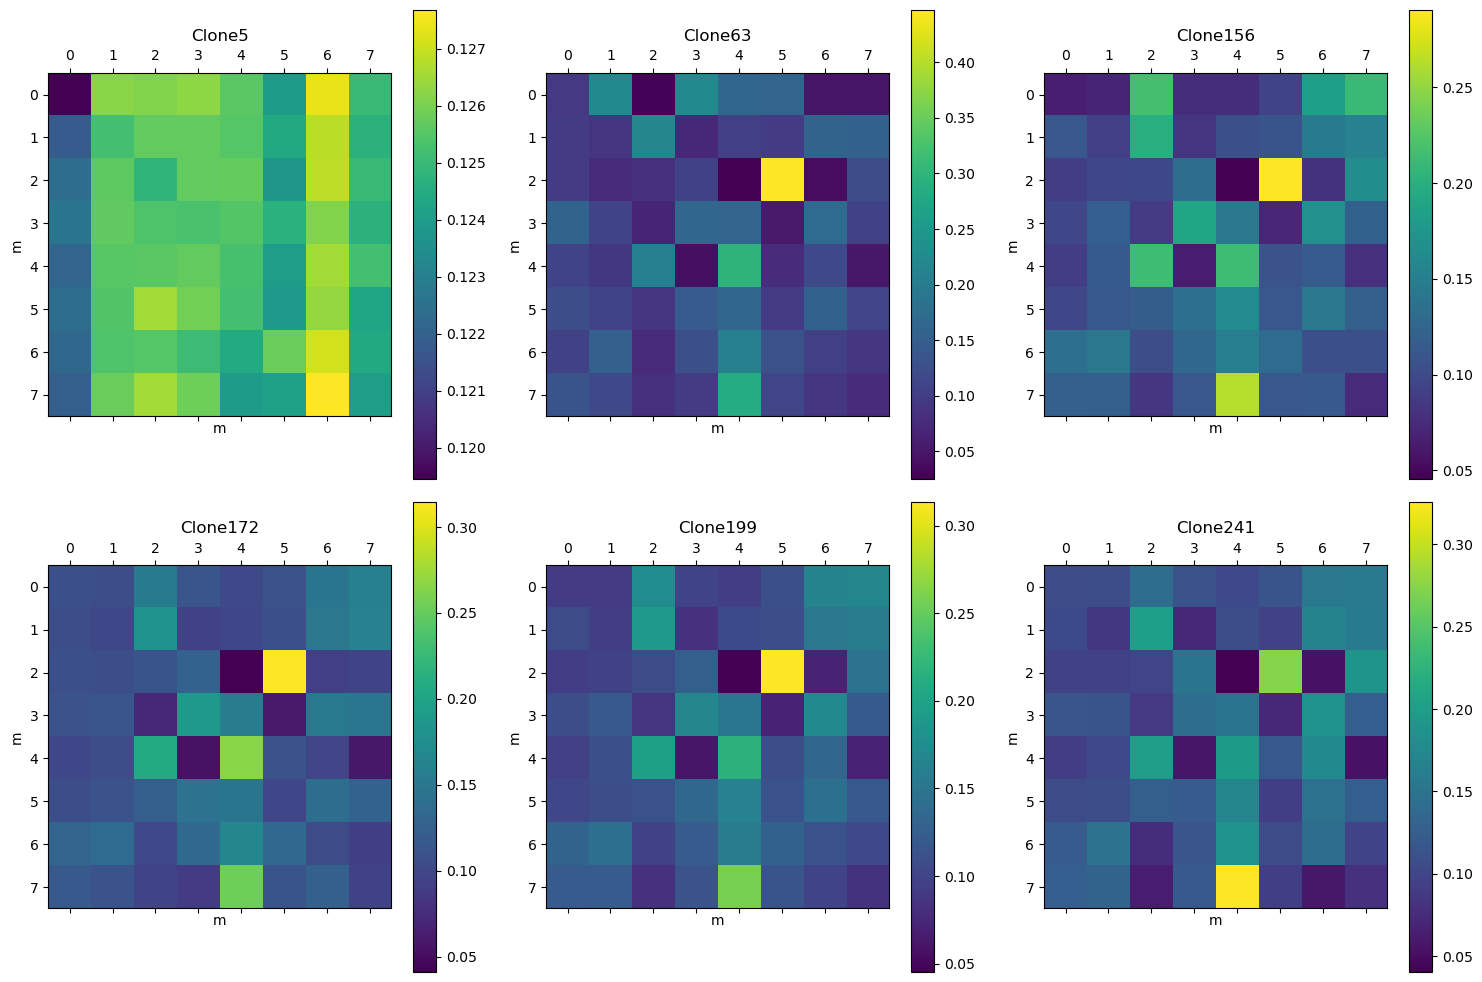

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Example data setup
# Assuming you have 145 samples, each with an 8x8 attention matrix and a label.
# For demonstration purposes, I'll generate some random data.
attention_matrices = attn1
labels = lbls

# Calculate the mean attention matrix for each label
unique_labels = np.unique(labels)
mean_attention_by_label = {}

for label in unique_labels:
    # Select attention matrices corresponding to the current label
    label_matrices = attention_matrices[labels == label]
    # Compute the mean attention matrix for this label
    mean_attention_by_label[label] = np.mean(label_matrices, axis=0)

# Plot the mean attention matrices in a grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

for i, label in enumerate(unique_labels):
    ax = axes[i // 3, i % 3]
    cax = ax.matshow(mean_attention_by_label[label]-attn, cmap='viridis')
    ax.set_title(f'{label_names[label]}')
    ax.set_xlabel('m')
    ax.set_ylabel('m')
    fig.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()


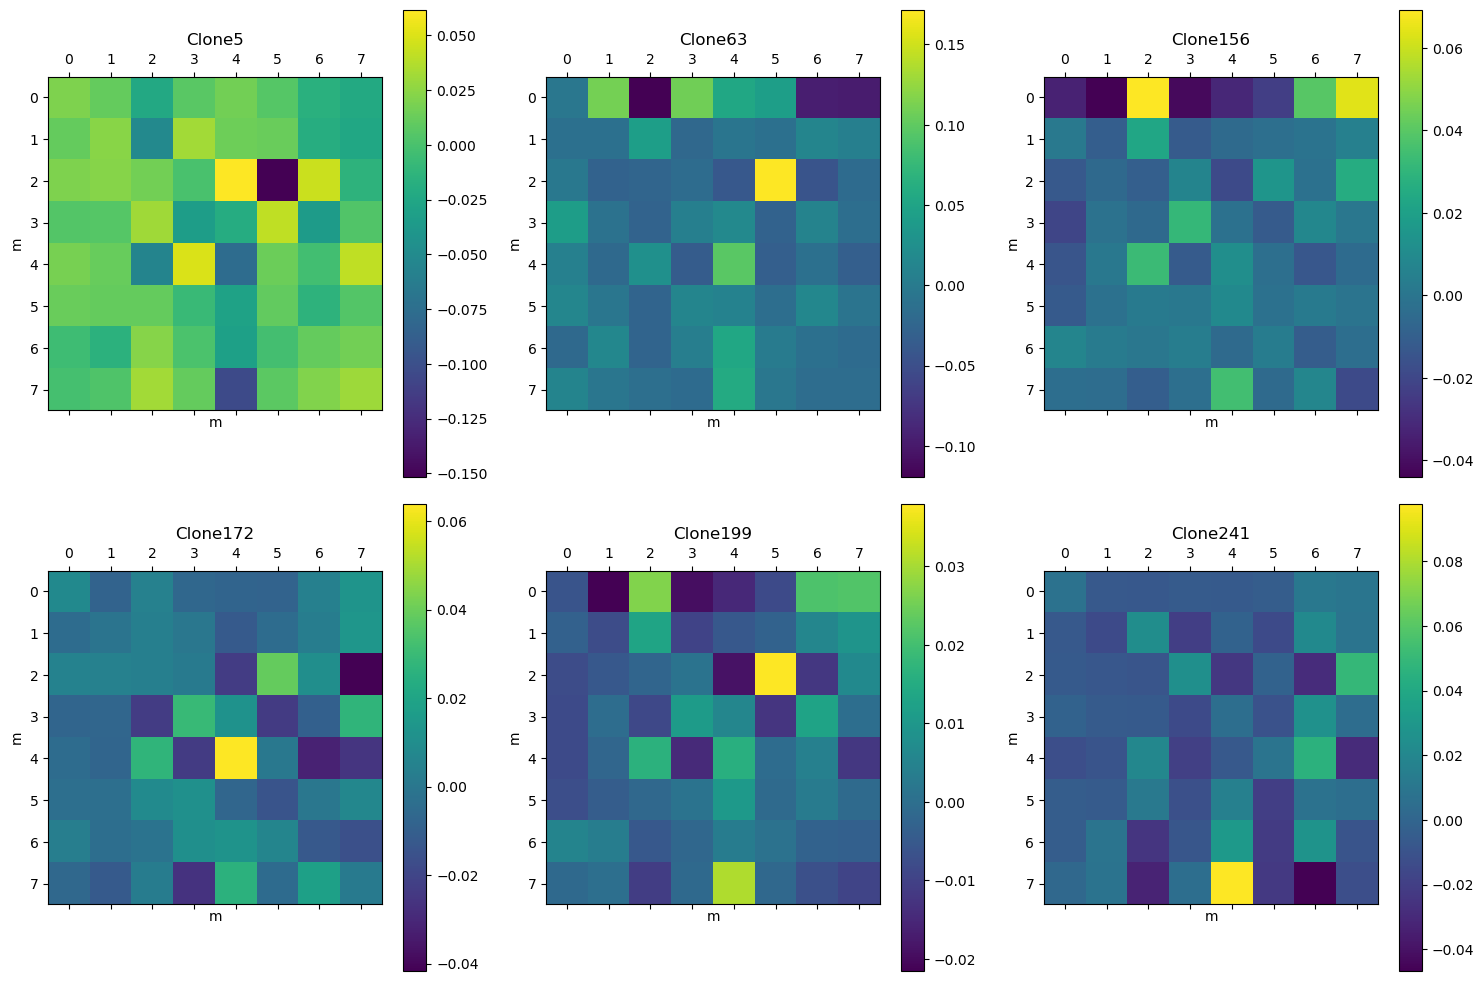

In [33]:
# Plot the mean attention matrices in a grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

for i, label in enumerate(unique_labels):
    ax = axes[i // 3, i % 3]
    cax = ax.matshow(mean_attention_by_label[label]-attn, cmap='viridis')
    ax.set_title(f'{label_names[label]}')
    ax.set_xlabel('m')
    ax.set_ylabel('m')
    fig.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()

(145, 64)
[  1  21  31  32  51 102  67 120  99  97 134  16  75  93 131  62  61 103
  70]
[  5 138 137 119 117 115 109 104 101 100  90  89  81  79  77  76  73  72
  68  59  55  52  43  40  35  34  33  15 139 143]
[ 64 126 123 116  82 136  44  56  38  30 118 121   3  49  57  63 132  66
  78 110  18   2]
[  0 128 125 108 107 106 105  96  88  85  80  71 130  65  47  45  42  29
  28  25  24  22  19  13  11  60 142]
[ 10  27  36  92 135  84 144  26  39  91 122 114 113 111  95  83  14   6
  94 112   4  46  37   9  50]
[  7 127 124  98  86  69 140  54 141  48  17  53  41  23  74  20  87  12
   8 129 133  58]
[  1  21  31  32  51 102  67 120  99  97 134  16  75  93 131  62  61 103
  70   5 138 137 119 117 115 109 104 101 100  90  89  81  79  77  76  73
  72  68  59  55  52  43  40  35  34  33  15 139 143  64 126 123 116  82
 136  44  56  38  30 118 121   3  49  57  63 132  66  78 110  18   2   0
 128 125 108 107 106 105  96  88  85  80  71 130  65  47  45  42  29  28
  25  24  22  19  13  11  6

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:44                                                                                   │
│                                                                                                  │
│   41 ax.set_yticklabels([f"{i}" for i in range(len(splits) - 1)], rotation=90)                   │
│   42                                                                                             │
│   43 # Set x-ticks for positions                                                                 │
│ ❱ 44 ax.set_xticklabels([f"{j+1}" for j in range(seq_length * seq_length)], minor=False)         │
│   45                                                                                             │
│   46 # Split resolutions                                                                         │
│   47 for x_tick in range(seq_length * seq_length):                                               │
│                                                                                                  │
│ /home/dashuo/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:63 in wrapper        │
│                                                                                                  │
│     60 │   │   get_method = attrgetter(f"{self.attr_name}.{self.method_name}")                   │
│     61 │   │                                                                                     │
│     62 │   │   def wrapper(self, *args, **kwargs):                                               │
│ ❱   63 │   │   │   return get_method(self)(*args, **kwargs)                                      │
│     64 │   │                                                                                     │
│     65 │   │   wrapper.__module__ = owner.__module__                                             │
│     66 │   │   wrapper.__name__ = name                                                           │
│                                                                                                  │
│ /home/dashuo/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/deprecation.py:451 in        │
│ wrapper                                                                                          │
│                                                                                                  │
│   448 │   │   │   │   "positionally is deprecated since Matplotlib %(since)s; the "              │
│   449 │   │   │   │   "parameter will become keyword-only %(removal)s.",                         │
│   450 │   │   │   │   name=name, obj_type=f"parameter of {func.__name__}()")                     │
│ ❱ 451 │   │   return func(*args, **kwargs)                                                       │
│   452 │                                                                                          │
│   453 │   return wrapper                                                                         │
│   454                                                                                            │
│                                                                                                  │
│ /home/dashuo/anaconda3/lib/python3.8/site-packages/matplotlib/axis.py:1796 in _set_ticklabels    │
│                                                                                                  │
│   1793 │   │   """                                                                               │
│   1794 │   │   if fontdict is not None:                                                          │
│   1795 │   │   │   kwargs.update(fontdict)                                                       │
│ ❱ 1796 │   │   return self.set_ticklabels(labels, minor=minor, **kwargs)                         │
│   1797 │                                                                                         │
│   1798 │   @cbook._make_keyword_only("3.2", "minor")       

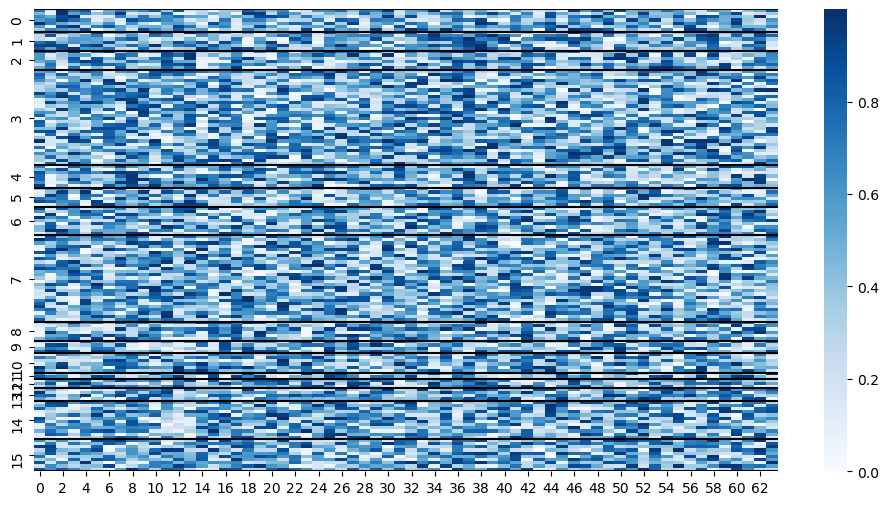

In [62]:
from sklearn.cluster import AgglomerativeClustering
# Example data setup
num_samples = 145
seq_length = 8
num_clusters = [3, 1, 3, 1, 6, 2]  # Number of sub-clusters per label
# Flatten attention matrices
flattened_attn = attention_matrices.reshape(num_samples, -1)

print(flattened_attn.shape)

# Cluster and order attention matrices by label
atn_order = []
counts = []
for label in np.unique(labels):
    indices = np.where(labels == label)[0]
    # Extract the corresponding attention matrices and indices
    # print(indices)
    atn_clone = flattened_attn[indices]
    clustering = AgglomerativeClustering(n_clusters=min(num_clusters[label], atn_clone.shape[0]))
    clustering.fit(atn_clone)
    permute_idx = indices[np.argsort(clustering.labels_)]
    # print(permute_idx)
    atn_order.append(permute_idx)
    counts.extend([np.sum(clustering.labels_ == i) for i in range(min(num_clusters[label], atn_clone.shape[0]))])

atn_order = np.concatenate(atn_order)

print(atn_order)
print(counts)

# Make permuted attention plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(flattened_attn[atn_order, :], ax=ax, cmap='Blues', vmin=0, yticklabels=False)

# Split clones
splits = np.insert(np.cumsum(counts), 0, 0)
for split in splits:
    plt.axhline(y=split, color='k', linestyle='-')

# Set y-ticks properly based on the splits
ax.set_yticks((splits[1:] + splits[:-1]) / 2)
ax.set_yticklabels([f"{i}" for i in range(len(splits) - 1)], rotation=90)

# Set x-ticks for positions
ax.set_xticklabels([f"{j+1}" for j in range(seq_length * seq_length)], minor=False)

# Split resolutions
for x_tick in range(seq_length * seq_length):
    ax.vlines(x=x_tick, ymin=0, ymax=flattened_attn.shape[0], linewidth=2, color='k')

ax.set_xlabel("Resolution (Position)")
ax.set_ylabel("Samples (Permuted within Clones)")

plt.ylim((splits[-1], 0))
plt.tight_layout()
plt.show()